## leemos los archivos

In [24]:
## partimos con el archivo en inglés

with open('Cap 1 and 2.txt', 'r', encoding='ascii', errors='ignore') as file_input:
        text = file_input.read()

In [25]:
text

'Space and place. The Perspective of Experience\n1 Introduction\nSpace and "place" are familiar words denoting common experiences. We live in space. There is no space for another building on the lot. The Great Plains look spacious. Place is security, space is freedom: we are attached to the one and long for the other. There is no place like home. What is home? It is the old homestead, the old neighborhood, home town, or motherland. Geographers study places. Planners would like to evoke "a sense of place." These are unexceptional ways of speaking. Space and place are basic components of the lived world; we take them for granted. When we think about them, however, they may assume unexpected meanings and raise questions we have not thought to ask.\nWhat is space? Let an episode in the life of the theologian Paul Tillich focus the question so that it bears on the meaning of space in experience. Tillich was born and brought up in a small town in eastern Germany before the turn of the centur

## limpiamos un poco el texto

In [57]:
## función para limpiar los textos
import string
import re
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

## stopwords
stop_words = set(stopwords.words('english'))
## lematizador
lemmatizer = WordNetLemmatizer()

## texto es un string
def clean(texto):
    
    ## dividimos por salto de línea
    texto = texto.split('\n')
    ## algunos caracteres 
    texto = [T.replace('\n', '') for T in texto]
    ## puntuación
    texto = [sent_tokenize(T) for T in texto]
    ## flat list de oraciones
    texto = [item for sublist in texto for item in sublist]
    ## puntuación
    texto = [T.translate(str.maketrans('', '', string.punctuation+'¿'+'—'+'”'+'“'+'!'+'¡')) for T in texto]
    ## removemos números
    texto = [''.join([i for i in T if not i.isdigit()]) for T in texto]
    ## espacios en blanco extra y ponemos en minúscula
    texto = [re.sub(' +', ' ', T).strip().lower() for T in texto]
    ## divimos en palabras
    texto = [T.split(' ') for T in texto]
    ## eliminamos stopwords
    texto = [[word for word in T if word not in stop_words] for T in texto]
    ## eliminamos oraciones de largo 1
    texto = [T for T in texto if len(T)>1]
    ## lematizador
    texto = [[lemmatizer.lemmatize(word) for word in T] for T in texto]
    
    return texto

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jxver\AppData\Roaming\nltk_data...


In [60]:
text = clean(text)

In [61]:
text

[['space', 'place'],
 ['perspective', 'experience'],
 ['space', 'place', 'familiar', 'word', 'denoting', 'common', 'experience'],
 ['live', 'space'],
 ['space', 'another', 'building', 'lot'],
 ['great', 'plain', 'look', 'spacious'],
 ['place', 'security', 'space', 'freedom', 'attached', 'one', 'long'],
 ['place', 'like', 'home'],
 ['old', 'homestead', 'old', 'neighborhood', 'home', 'town', 'motherland'],
 ['geographer', 'study', 'place'],
 ['planner', 'would', 'like', 'evoke', 'sense', 'place'],
 ['unexceptional', 'way', 'speaking'],
 ['space', 'place', 'basic', 'component', 'lived', 'world', 'take', 'granted'],
 ['think',
  'however',
  'may',
  'assume',
  'unexpected',
  'meaning',
  'raise',
  'question',
  'thought',
  'ask'],
 ['let',
  'episode',
  'life',
  'theologian',
  'paul',
  'tillich',
  'focus',
  'question',
  'bear',
  'meaning',
  'space',
  'experience'],
 ['tillich',
  'born',
  'brought',
  'small',
  'town',
  'eastern',
  'germany',
  'turn',
  'century'],
 ['t

## construimos redes!

In [65]:
import networkx as nx

## función que construye redes
def GoW_adj(text_clean):
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
        
    return G

In [78]:
G = GoW_adj(text)

In [79]:
## número de nodos (palabras)

len(G)

1345

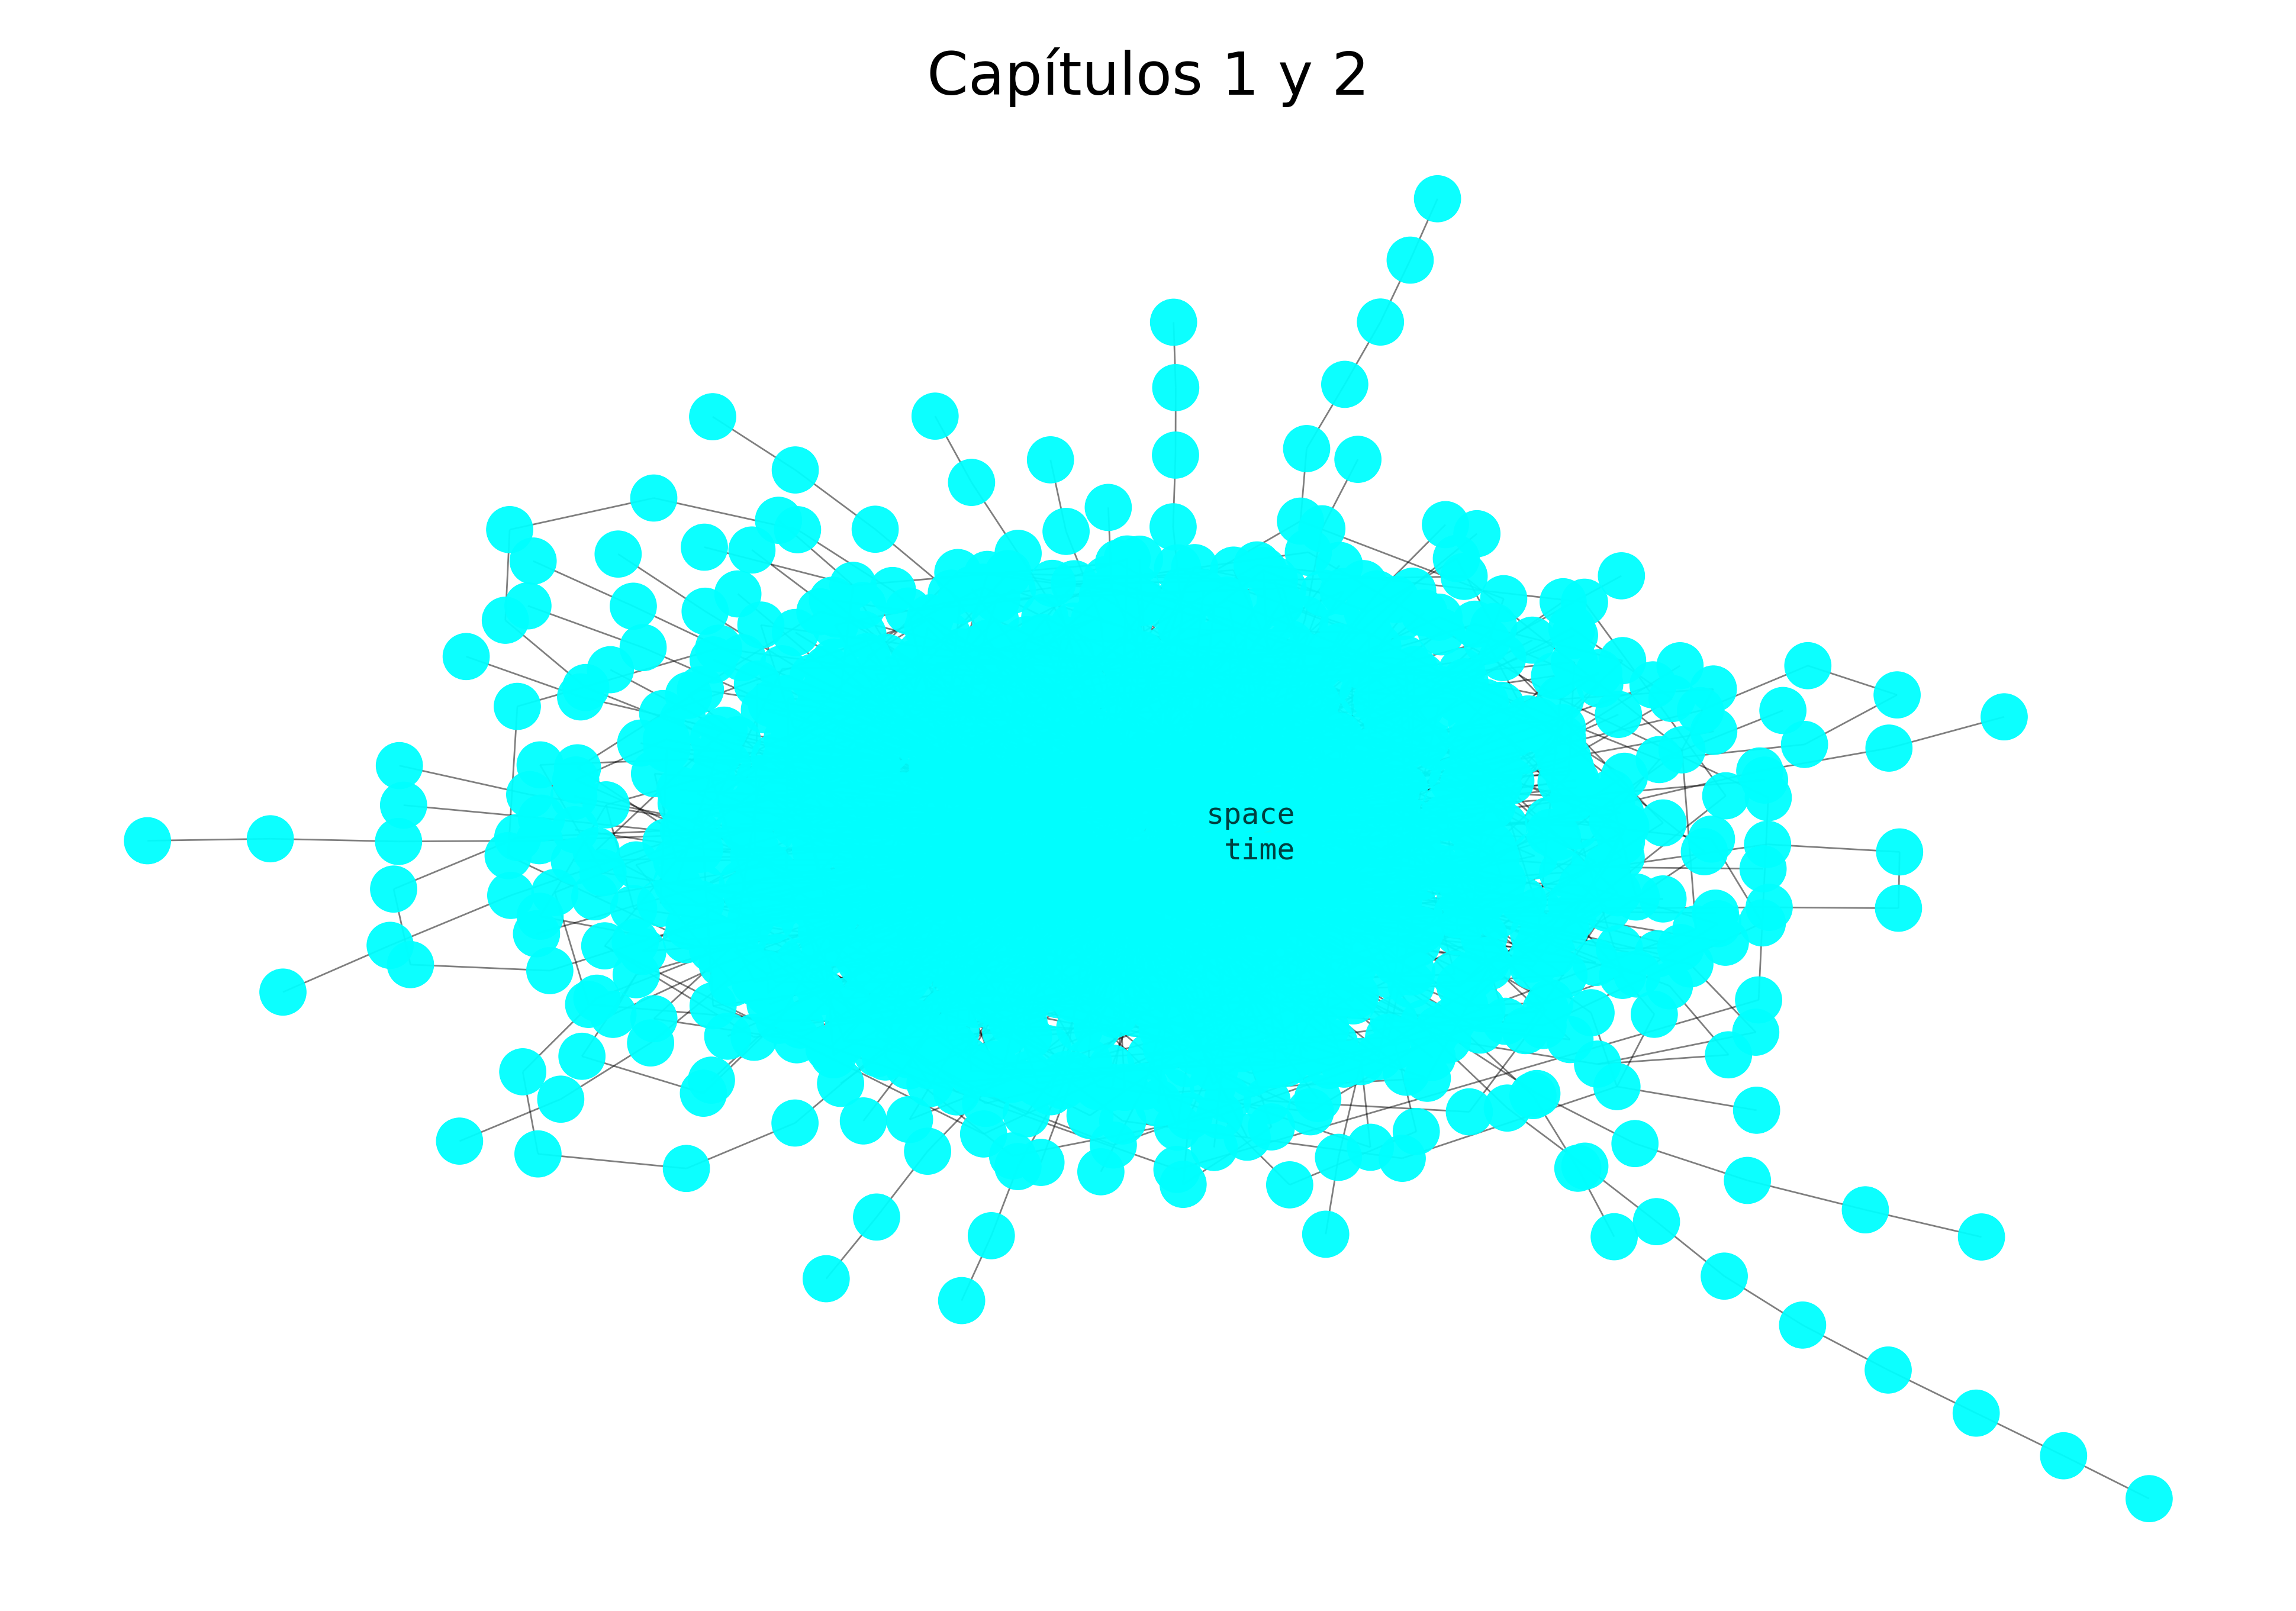

In [82]:
## visualizamos
import matplotlib.pyplot as plt

pos = nx.kamada_kawai_layout(G)

fig, ax = plt.subplots(dpi=800)
 
labels = {i:i for i in G.nodes() if i in ['space','time']}
    
nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1,cmap=plt.cm.autumn.reversed()) 
nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.25,edge_color='k')
nx.draw_networkx_labels(G,pos,labels,alpha=0.75,font_size=4.5,font_color='k',font_family='monospace')
plt.axis('off')
plt.title('Capítulos 1 y 2',fontsize=9)
#plt.savefig('graph_'+str(areas)+'.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

Text(0.5, 1.0, 'Q = 0.58')

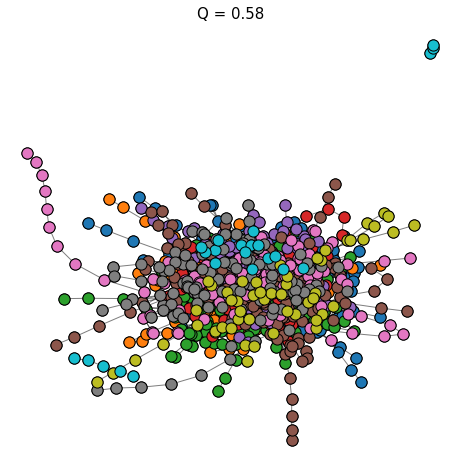

In [86]:
from cdlib import algorithms, viz, evaluation

pos = nx.spring_layout(G)

coms = algorithms.leiden(G)
    #pos = nx.kamada_kawai_layout(g)
viz.plot_network_clusters(G, coms, pos, node_size=125,cmap=plt.get_cmap('tab10'))
plt.title('Q = '+str(round(evaluation.newman_girvan_modularity(G,coms).score,2)),fontsize=15)